In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [66]:
df = pd.read_csv('world_happiness_rank_2020.csv')

In [67]:
df_2015 = pd.read_csv('world_happiness_rank_2015.csv')
df_2016 = pd.read_csv('world_happiness_rank_2016.csv')
df_2017 = pd.read_csv('world_happiness_rank_2017.csv')
df_2018 = pd.read_csv('world_happiness_rank_2018.csv')
df_2019 = pd.read_csv('world_happiness_rank_2019.csv')

In [68]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [69]:
#2020 data
xa = df['Country name'].head(10)
ya = df['Ladder score'].head(10)

df1= df[['Regional indicator', 'Ladder score']].groupby('Regional indicator').mean()
df1 = df1.sort_values(by= 'Ladder score', ascending=False)

xb = df1.index
yb = df1['Ladder score']

In [70]:
#Creating dataset for evolution of top 5 happiest countries 
legend = ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland']

data = {'Country': ['1', '2', '3', '4', '5', '1', '2', '3', '4', '5', '1', '2', '3', '4', '5', '1', '2', '3', '4', '5', '1', '2', '3', '4', '5', '1', '2', '3', '4', '5'],
        'Happiness Score': [7.587, 7.561, 7.527, 7.522, 7.406, 7.509, 7.501, 7.526, 7.498, 7.413, 7.494, 7.504, 7.522, 7.537, 7.469, 7.487, 7.495, 7.555, 7.594, 7.632, 7.480, 7.494, 7.600, 7.554, 7.769, 7.559, 7.504, 7.645, 7.488, 7.808],
        'Year': [2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020]}

df_all = pd.DataFrame(data=data)
df_all['Country'] = df_all['Country'].astype('int')

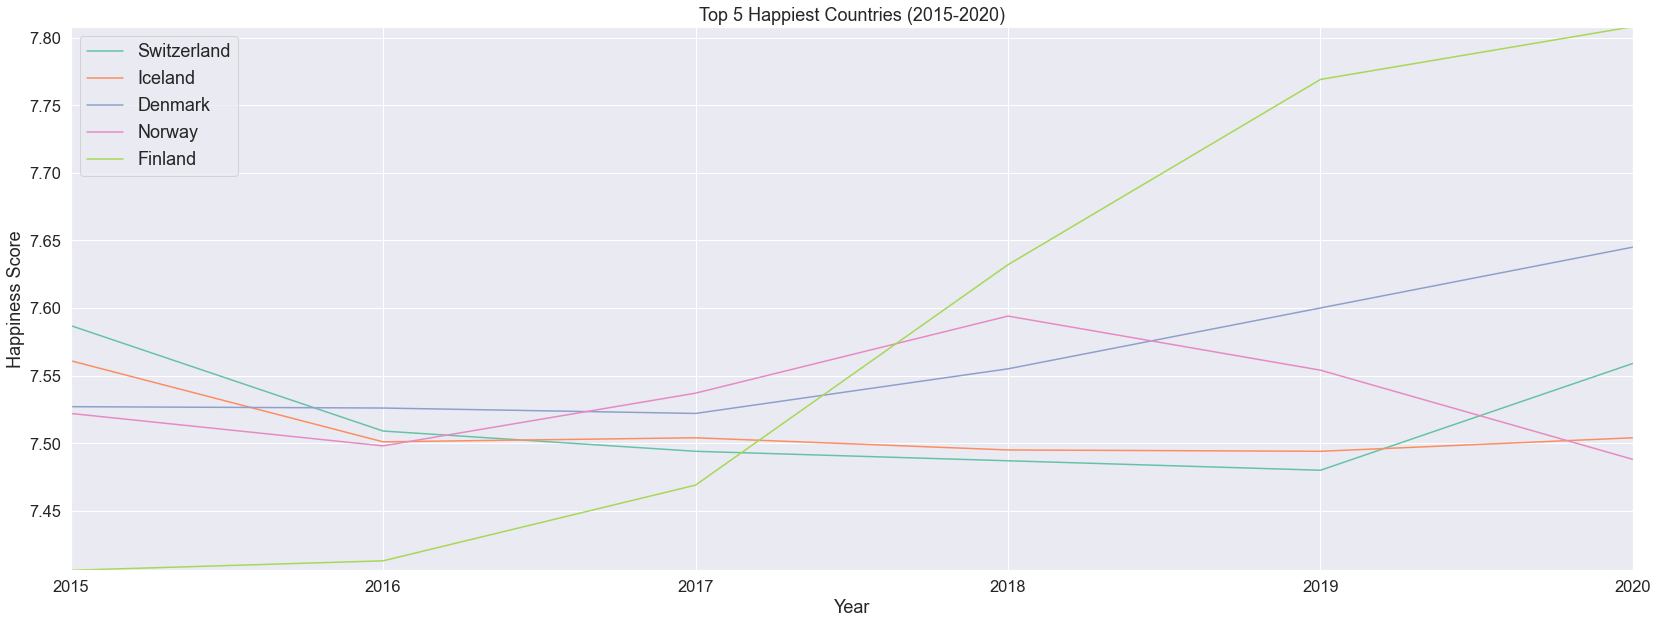

In [71]:
#Plotting evolution of top 5 happiest countries
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(28,10))

sns.lineplot(x= df_all['Year'], y=df_all['Happiness Score'], data=df_all, hue=df_all['Country'], legend=False , palette="Set2", ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Happiness Score')
ax.set_title('Top 5 Happiest Countries (2015-2020)')
ax.legend(legend, fontsize= 'medium')
ax.margins(0)

Text(0.5, 1.0, 'Which Regions Score the Happiest (2020)')

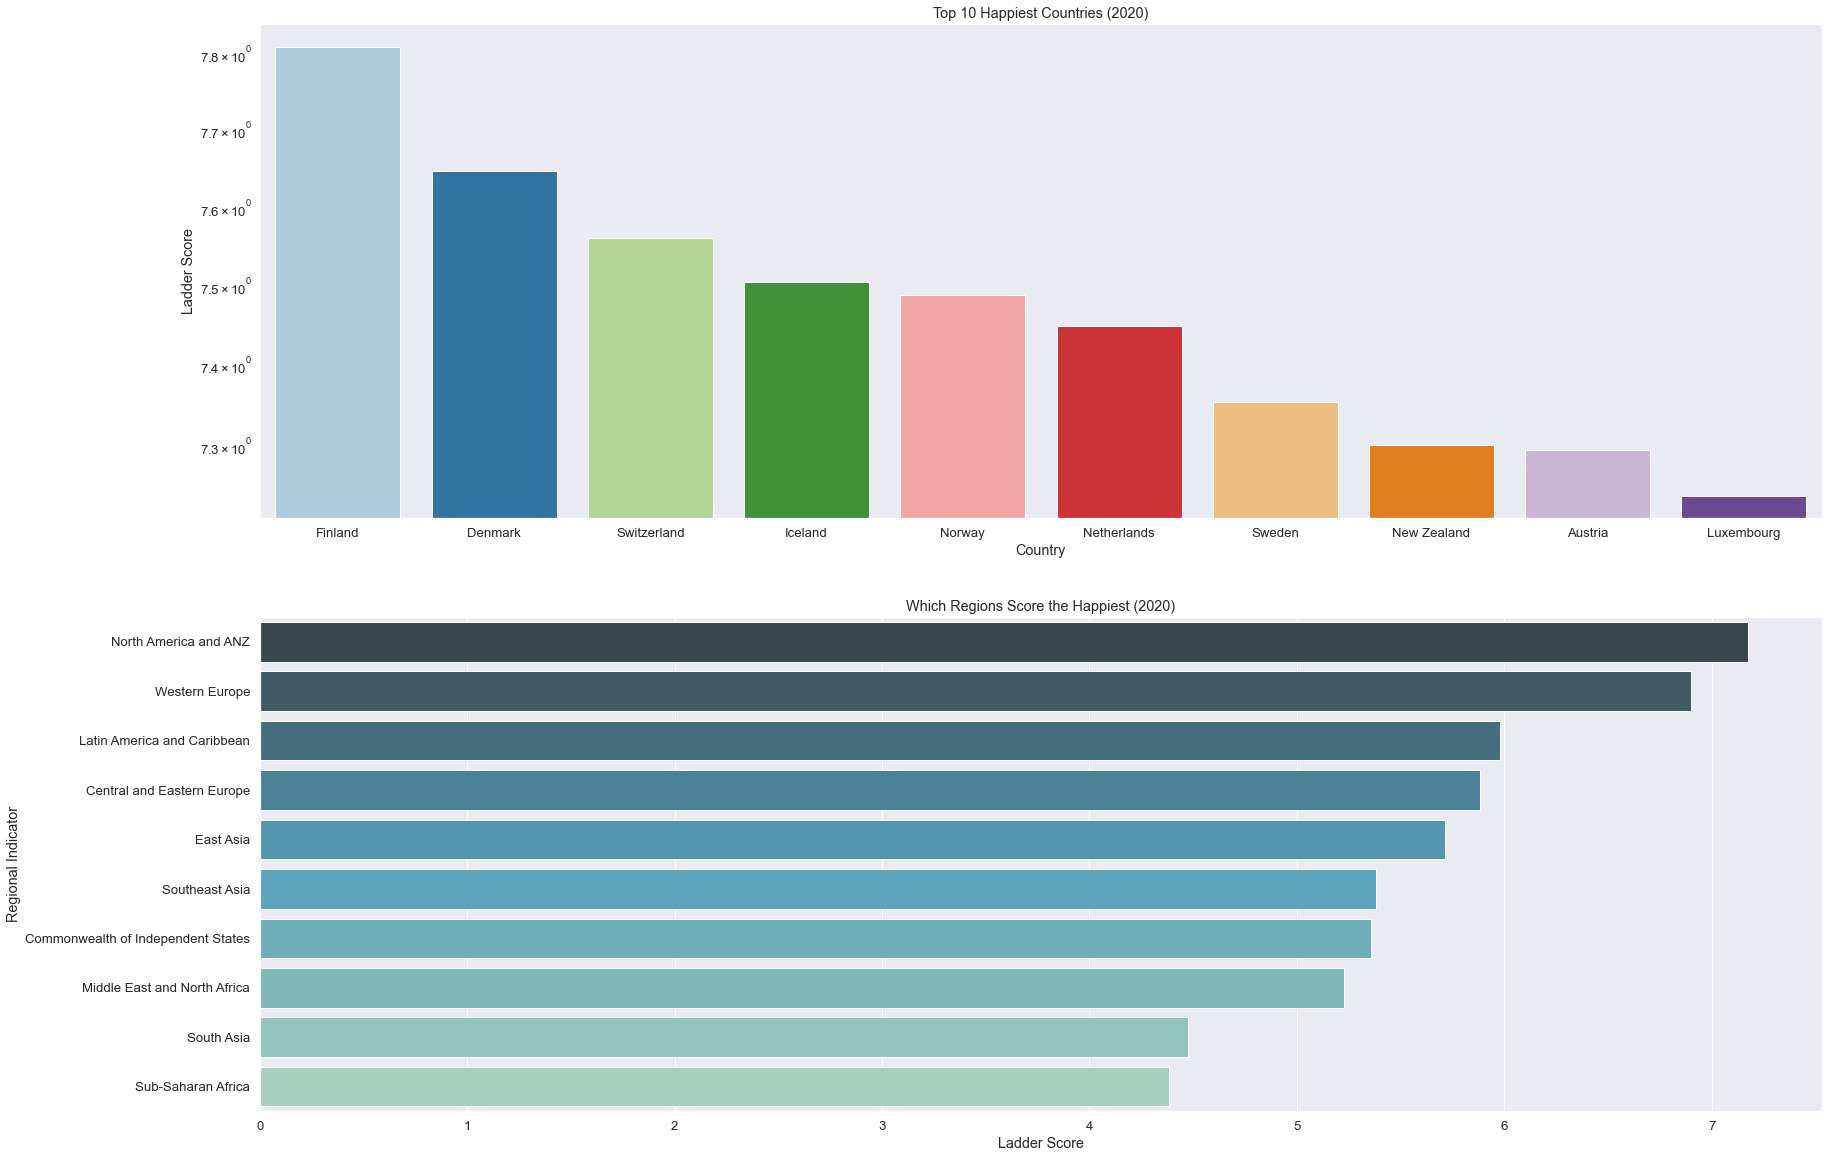

In [72]:
#Plotting Top 10 Happiest Countries and Top Regional Indicators
sns.set(font_scale=1.2)

fig, (ax, ax1)=plt.subplots(2,1,figsize=(28,20))

sns.barplot(x=xa, y=ya, data=df, palette="Paired", ax = ax)
ax.set_xlabel('Country')
ax.set_ylabel('Ladder Score')
ax.set_title('Top 10 Happiest Countries (2020)')
ax.set_yscale('log')

sns.barplot(x=yb, y=xb, data=df, palette="GnBu_d", ax = ax1)
ax1.set_xlabel('Ladder Score')
ax1.set_ylabel('Regional Indicator')
ax1.set_title('Which Regions Score the Happiest (2020)')

In [73]:
#Assigning the axes for correlations between several features
x1= df['Logged GDP per capita']
y1= df['Healthy life expectancy']

x2= df['Logged GDP per capita']
y2= df['Perceptions of corruption']

x3= df['Freedom to make life choices']
y3= df['Perceptions of corruption']

x4= df['Logged GDP per capita']
y4= df['Social support']

Text(0.5, 1.0, 'Correlation Betwwen GDP and Social Support')

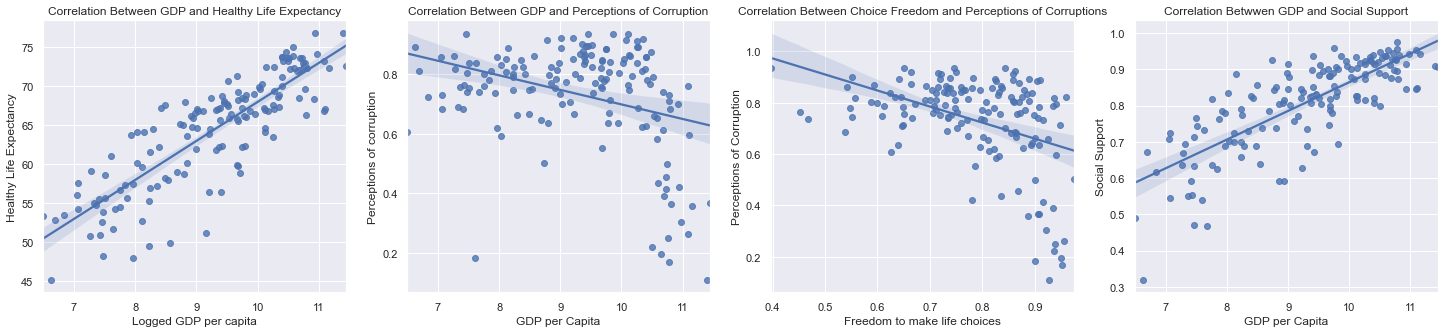

In [74]:
#Plotting

sns.set()
fig, (ax2, ax3, ax4, ax5)=plt.subplots(1,4, figsize=(25,5))

#ax2
ax2 = sns.regplot(x=x1, y=y1, data=df, ax = ax2)
ax2.set_xlabel('Logged GDP per capita')
ax2.set_ylabel('Healthy Life Expectancy')
ax2.set_title('Correlation Between GDP and Healthy Life Expectancy')

ax3
ax3 = sns.regplot(x=x2, y=y2, data=df, ax= ax3)
ax3.set_xlabel('GDP per Capita')
ax3.set_ylabel('Perceptions of corruption')
ax3.set_title('Correlation Between GDP and Perceptions of Corruption')

ax4
ax4 = sns.regplot(x=x3, y=y3, data=df, ax= ax4)
ax4.set_xlabel('Freedom to make life choices')
ax4.set_ylabel('Perceptions of Corruption')
ax4.set_title('Correlation Between Choice Freedom and Perceptions of Corruptions')

#ax5
ax5 = sns.regplot(x=x4, y=y4, data=df, ax= ax5)
ax5.set_xlabel('GDP per Capita')
ax5.set_ylabel('Social Support')
ax5.set_title('Correlation Betwwen GDP and Social Support')

In [75]:
#Pearson correlation
def r_coef(x,y):
    r = np.corrcoef(x,y)
    return r[0,1]

print('The correlation between GDP per capita and Healthy Life Expectancy:', r_coef(x1,y1), 
     '\nThe correlation betwwen GDP per capita and social suppport:', r_coef(x4, y4),
     '\nLow correlations:\nThe correlation between freedom to make life choices and perceptions of corruption:', r_coef(x3,y3),
     '\nThe correlation betwwen GDP per capita and perceptions of corruption:', r_coef(x2, y2))


The correlation between GDP per capita and Healthy Life Expectancy: 0.848468617426851 
The correlation betwwen GDP per capita and social suppport: 0.78181358314554 
Low correlations:
The correlation between freedom to make life choices and perceptions of corruption: -0.4201445048765981 
The correlation betwwen GDP per capita and perceptions of corruption: -0.3347290773443204


In [76]:
#Assigning the axes for correaltions between GDP per capita and healthy life expenctancy
x_15 = df_2015['Economy (GDP per Capita)']
y_15 = df_2015['Health (Life Expectancy)']

x_16 = df_2016['Economy (GDP per Capita)']
y_16 = df_2016['Health (Life Expectancy)']

x_17 = df_2017['Economy..GDP.per.Capita.']
y_17 = df_2017['Health..Life.Expectancy.']

x_18 = df_2018['GDP per capita']
y_18 = df_2018['Healthy life expectancy']

x_19 = df_2019['GDP per capita']
y_19 = df_2019['Healthy life expectancy']

Text(0.5, 1.0, 'Correlation GDP and Life Expectancy (2019)')

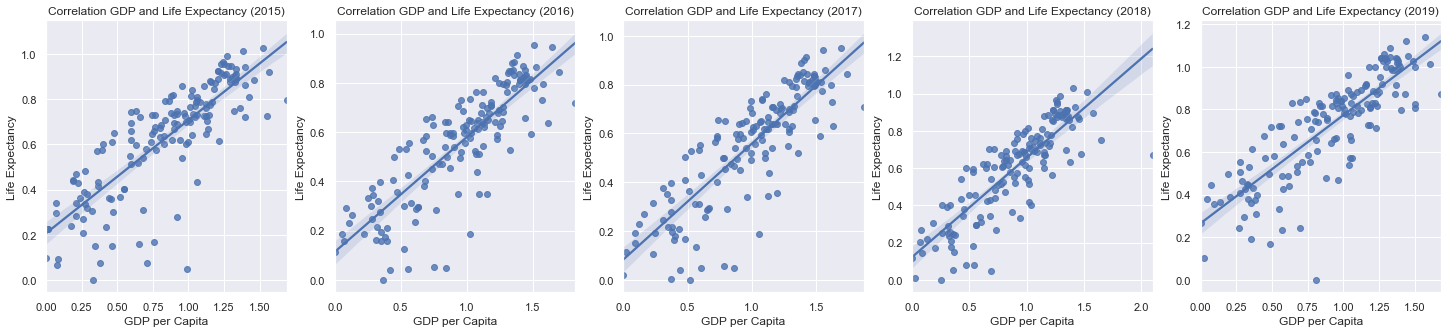

In [77]:
#Plotting Correlation Betwwen GDP per capita and healthy life expectancy from 2015 - 2019
sns.set()
fig, (ax, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(25,5))

sns.regplot(x= x_15, y= y_15, data=df_2015, ax = ax)
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Life Expectancy')
ax.set_title('Correlation GDP and Life Expectancy (2015)')

sns.regplot(x= x_16, y= y_16, data=df_2016, ax = ax1)
ax1.set_xlabel('GDP per Capita')
ax1.set_ylabel('Life Expectancy')
ax1.set_title('Correlation GDP and Life Expectancy (2016)')

sns.regplot(x= x_17, y= y_17, data=df_2017, ax = ax2)
ax2.set_xlabel('GDP per Capita')
ax2.set_ylabel('Life Expectancy')
ax2.set_title('Correlation GDP and Life Expectancy (2017)')

sns.regplot(x= x_18, y= y_18, data=df_2018, ax = ax3)
ax3.set_xlabel('GDP per Capita')
ax3.set_ylabel('Life Expectancy')
ax3.set_title('Correlation GDP and Life Expectancy (2018)')

sns.regplot(x= x_19, y= y_19, data=df_2019, ax = ax4)
ax4.set_xlabel('GDP per Capita')
ax4.set_ylabel('Life Expectancy')
ax4.set_title('Correlation GDP and Life Expectancy (2019)')

In [78]:
#r_coef

print('All the correlations below are comparing GDP per capita and healthy life expenctancy throughtout the years:\n2015 Correlation:', r_coef(x_15, y_15),
     '\n2016 Correlation:', r_coef(x_16, y_16),
     '\n2017 Correlation:', r_coef(x_17, y_17),
     '\n2018 Correlation:', r_coef(x_18, y_18),
     '\n2019 Correlation:', r_coef(x_19, y_19),
     '\n2020 CORRELATION:', r_coef(x1, y1))

All the correlations below are comparing GDP per capita and healthy life expenctancy throughtout the years:
2015 Correlation: 0.8164780030856987 
2016 Correlation: 0.8370672306340119 
2017 Correlation: 0.843076639683372 
2018 Correlation: 0.8442732275946608 
2019 Correlation: 0.8354621150416076 
2020 CORRELATION: 0.848468617426851


In [79]:
#Assigning the axes for correaltions between GDP per capita and Social Support
x_18_s = df_2018['GDP per capita']
y_18_s = df_2018['Social support']

x_19_s = df_2019['GDP per capita']
y_19_s = df_2019['Social support']

In [80]:
print('All the correlations below are comparing GDP per capita and Social Support\n2018 Correlation:', r_coef(x_18_s, y_18_s),
     '\n2019 Correlation:', r_coef(x_19_s, y_19_s),
     '\n2020 CORRELATION:', r_coef(x4, y4))

All the correlations below are comparing GDP per capita and Social Support
2018 Correlation: 0.6720800199809623 
2019 Correlation: 0.7549057272454568 
2020 CORRELATION: 0.78181358314554
